# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** Luca Fetz & Mohammed-Ismail Ben Salah 
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

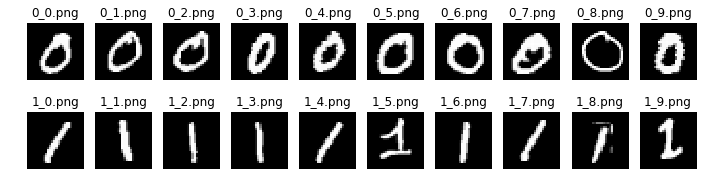

In [3]:
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion


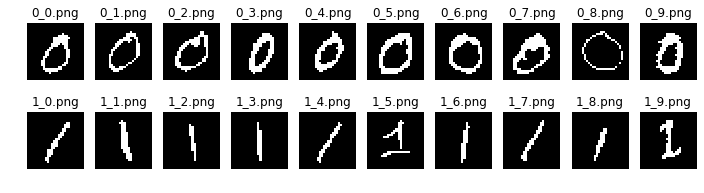

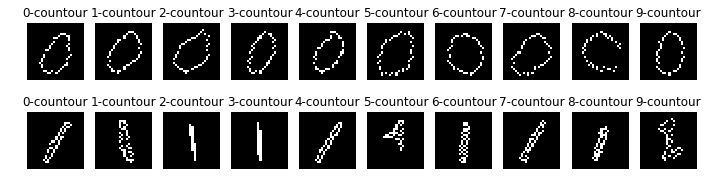

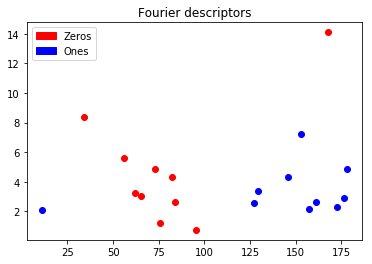

In [4]:
# u_k = x_k + j y_k

#fft(zeros_im[0]);

# Import stuff
import numpy as np
from skimage.filters import threshold_minimum
from scipy.fftpack import fft, ifft
from skimage.measure import find_contours
from scipy.signal import resample
_
#extract number of images and number of pixels
N_images, dim,_ = zeros_im.shape

# Morphological stuff

#binarize images and count number of points to be in descriptor
zeros_im_bin = zeros_im.copy()
min_thres  = threshold_minimum(zeros_im_bin)
cust_thres = 230
zeros_im_bin = zeros_im_bin > cust_thres

ones_im_bin = ones_im.copy()
min_thres = threshold_minimum(ones_im_bin)
ones_im_bin = ones_im_bin > cust_thres
            
# Convert to uint8 
zeros_im_bin = zeros_im_bin * 255
ones_im_bin = ones_im_bin * 255

#visualize binarization
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im_bin, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im_bin, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
plt.show()
    
zeros_contours = []
ones_contours = []

# Find countours fo each image
for idx in range(0,N_images):
    # Find countours return multiples iso-v
    zero_countour = find_contours(zeros_im_bin[idx],128,fully_connected='high',positive_orientation='low')
    zeros_contours.append(zero_countour)
    one_countour = find_contours(ones_im_bin[idx],128,fully_connected='high',positive_orientation='low')
    ones_contours.append(one_countour)


def convert_countour_to_image(dim_img,countour):
    img_countour = np.zeros((dim_img,dim_img))
    np_countour = np.around(countour).astype(int) # Round the coordinates
    for coord_elem in np_countour:
        row = coord_elem[0]
        col = coord_elem[1]
        img_countour[row,col] = 255
    return img_countour

#for idx in range(0,N_images):
#    for countour in ones_contours[idx]:
#        fig, ax = plt.subplots(1, figsize=(12, 3))
#        ax.imshow(convert_countour_to_image(dim,countour), cmap='gray')
#        ax.axis('off')
#        ax.set_title('{}-countour'.format(idx))    
        
# Keep only the first contours of each image
zeros_unique_countours = []
for idx in range(0,N_images):
    zeros_unique_countours.append(zeros_contours[idx][0])
# Keep only the first contours of each image
ones_unique_countours = []
for idx in range(0,N_images):
        ones_unique_countours.append(ones_contours[idx][0])


# Print the length of a countour and take the minimum length
#print("zero len")
#for idx,elem in enumerate(zeros_unique_countours):
#    print("Image N°{} has length : {}".format(idx,len(elem)))

#print("one len")
#for idx,elem in enumerate(ones_unique_countours):
#    print("Image N°{} has length : {}".format(idx,len(elem)))
    
zero_ctr_min_length = min([len(x) for x  in zeros_unique_countours])
ones_ctr_min_length = min([len(x) for x  in ones_unique_countours])
min_ctr_length = min(zero_ctr_min_length,ones_ctr_min_length)

#Resamples all signals
zeros_resampled = []
ones_resampled = []

for idx in range(0,N_images):
    zeros_resampled.append(resample(zeros_unique_countours[idx],min_ctr_length))
    ones_resampled.append(resample(ones_unique_countours[idx],min_ctr_length))


    

fig, ax = plt.subplots(2,N_images, figsize=(12, 3))
for idx in range(0,N_images):
        ax[0,idx].imshow(convert_countour_to_image(dim,zeros_resampled[idx]), cmap='gray')
        ax[0,idx].axis('off')
        ax[0,idx].set_title('{}-countour'.format(idx))
        ax[1,idx].imshow(convert_countour_to_image(dim,ones_resampled[idx]), cmap='gray')
        ax[1,idx].axis('off')
        ax[1,idx].set_title('{}-countour'.format(idx))
plt.show()

    
def conv_to_complex(xy):
    c=xy[:,0]+1j*xy[:,1]
    return c

# Convert x-y to complex number
cplx_zeros_resampled = []
cplx_ones_resampled = []
for idx in range(0,N_images):
    cplx_zeros_resampled.append(conv_to_complex(zeros_resampled[idx])) 
    cplx_ones_resampled.append(conv_to_complex(ones_resampled[idx])) 
    

# Generate fourier descriptors
zeros_fft_desc = []
ones_fft_desc  = []
for idx in range(0,N_images):
    zeros_fft_desc.append(fft(cplx_zeros_resampled[idx]))
    ones_fft_desc.append(fft(cplx_ones_resampled[idx]))
    
# Plot the fourier descriptors
for idx,elem in enumerate(ones_fft_desc):
    plt.plot(abs(zeros_fft_desc[idx][1]),abs(zeros_fft_desc[idx][5]),'ro')
    plt.plot(abs(ones_fft_desc[idx][1]),abs(ones_fft_desc[idx][5]),'bo')
    
red_patch = mpatches.Patch(color='red', label='Zeros')
blue_patch = mpatches.Patch(color='blue', label='Ones')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Fourier descriptors')
plt.show()

### 1.3 Additional method(s)
For the additionnal descriptors we have taken two approaches : the first approach is using simple region-based descriptors such that the area,the perimeters and the compacity and the second is using image moments to describe features

In [ ]:
import skimage.morphology as morph
import math
from skimage.measure import find_contours,moments
 

#extract number of images and number of pixels
N_images, N,tmp = zeros_im.shape

#binarize images
cust_thres = 230
zeros_im_bin = zeros_im.copy()
zeros_im_bin = zeros_im_bin > cust_thres

ones_im_bin = ones_im.copy()
ones_im_bin = ones_im_bin > cust_thres

# Convert to uint8 
zeros_im_bin = zeros_im_bin * 255
ones_im_bin  = ones_im_bin * 255

#morphology for area computation
full_zeros = []
full_ones = []
area_zeros = []
area_ones = []
area_tmp_zeros = 0
area_tmp_ones = 0
struct_elem = morph.disk(8)
for i in range(0,N_images):
    full_zeros.append(morph.closing(zeros_im_bin[i],struct_elem))
    full_ones.append(morph.closing(ones_im_bin[i],struct_elem))
    
for i in range(0,N_images):
    area_tmp_zeros = 0
    area_tmp_ones = 0
    for j in range(0,N):
        for k in range(0,N):
            if full_zeros[i][j,k] == 255:
                area_tmp_zeros = area_tmp_zeros+1
            if full_ones[i][j,k] == 255:
                area_tmp_ones = area_tmp_ones+1
    area_zeros.append(area_tmp_zeros)
    area_ones.append(area_tmp_ones)
    

fig, ax = plt.subplots(2,N_images, figsize=(12, 3))
for idx in range(0,N_images):
        ax[0,idx].imshow(full_zeros[idx], cmap='gray')
        ax[0,idx].axis('off')
        ax[0,idx].set_title('{}-countour'.format(idx))
        ax[1,idx].imshow(full_ones[idx], cmap='gray')
        ax[1,idx].axis('off')
        ax[1,idx].set_title('{}-countour'.format(idx))
plt.show()

#contour_zeros will be a list of lists of ndarrays with the coordinates of the contour
#access it with contour_zeros[im_idx,arra_idx,]
contour_zeros = []
contour_ones = []
for i in range(0,N_images):
    contour_zeros.append(find_contours(zeros_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    contour_ones.append(find_contours(ones_im_bin[i], 128, fully_connected='high', positive_orientation='low'))
    

#plot perimeter
for i in range(0,N_images):
    plt.plot(len(contour_zeros[i][0]),len(contour_zeros[i][0]),'ro',len(contour_ones[i][0]),len(contour_ones[i][0]),'bo')

red_patch = mpatches.Patch(color='red',label='Zeros')
blue_patch = mpatches.Patch(color='blue', label='Ones')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Perimeter')
plt.show()

#plot area
for i in range(0,N_images):
    plt.plot(area_zeros[i],area_zeros[i],'ro',area_ones[i],area_ones[i],'bo')
    
red_patch = mpatches.Patch(color='red',label='Zeros')
blue_patch = mpatches.Patch(color='blue', label='Ones')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Area')
plt.show()

#plot compacity
for i in range(0,N_images):
    plt.plot(((len(contour_zeros[i][0]))**2) /(area_zeros[i]),((len(contour_zeros[i][0]))**2) /(area_zeros[i]),'ro',((len(contour_ones[i][0]))**2) /(area_ones[i]),((len(contour_ones[i][0]))**2) /(area_ones[i]),'bo')

red_patch = mpatches.Patch(color='red',label='Zeros')
blue_patch = mpatches.Patch(color='blue', label='Ones')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Compacity')
plt.show()

### 1.3 Image Moments descriptors

Reference : https://en.wikipedia.org/wiki/Image_moment

For the Image Moment descriptors we looked to classify the ones and the zeros using 4 differents metrics :
1. Area which is the Moment0,0
2. Centroids of the image
3. Covariance Matrix Eigenvalues
4. Eccentricy of the image based on eigenvalues
5.

In this part the code is structured as follow : 1) Compute the image moments, 2) Derivate a given measure and plot it. A remark on the plots : since the Area and the Eccentricy are single scaler we plotted the same value on both axis

We had multiples observations on the given results :
1. Area : As seen using a classical method we can cleary separate the two populations
2. Centroids of image : As both populations are more or less centered on the image then we can hardly distinguish them.
3. As we know the eigenvalues express the variance of the shape projected on the intertia axis, on the first plot we see that the clusters are mixed on both axis but on the normal axis (y-axis) there's more zeros but at don't give any relevant separation. 
4. From this constation we compute the eccentricy which give us how different are the magnitude of the eigenvalues. We compute this since zeros should have similar variance on both axis but ones should have a much smaller variance on the normal axis. As expected we can separate both clearly but having outliers since depending on how is written the number. 
5. When looking on particular axis we see that on the axis 1 (longitudinal axis) there's not clear separation since all the number are quite elongated but on axis 2 (normal axis) we clearly see the separation since zeros have a biff



C:\Users\Ismail-P51\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


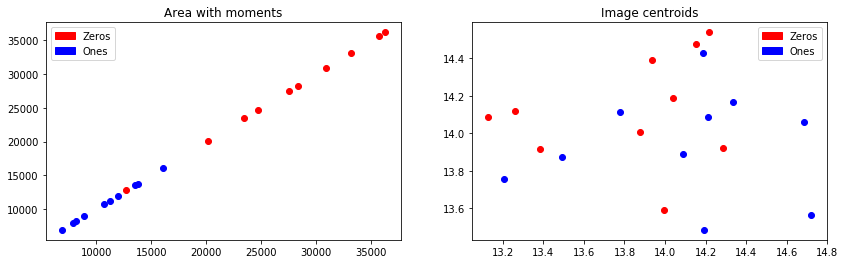

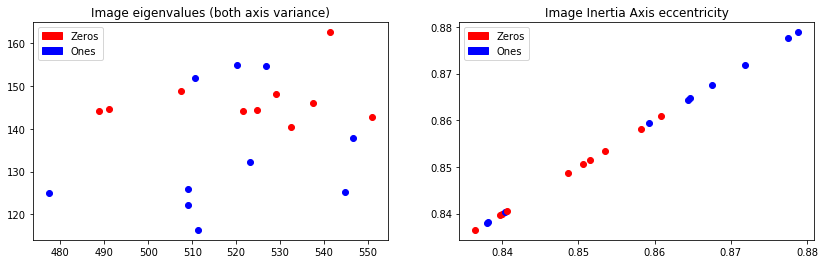

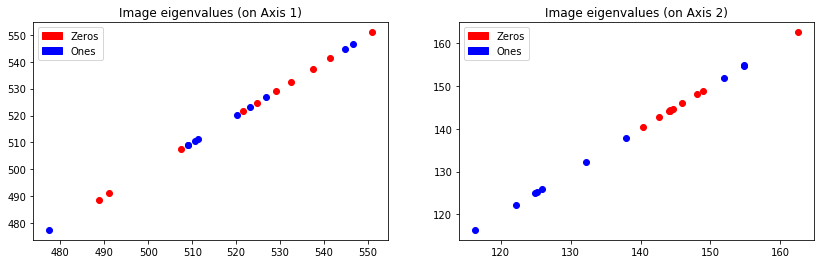

In [31]:
# Image Moments Methods

def get_area_moment(img):
    M = moments(img)
    cr = M[0, 0] 
    cc = M[0, 0]
    return [cr,cc]

def get_centroid(img):
    M = moments(img)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    return [cr,cc]

def get_eigen_values(img):
    M = moments(img)
    p_u_20 = M[2,0]/M[0,0]
    p_u_02 = M[0,2]/M[0,0]
    p_u_11 = M[1,1]/M[0,0]
    
    
    delta = math.sqrt((4*(p_u_11**2)+(p_u_20-p_u_02)**2))/2
    eigval_1 = (p_u_20+p_u_02/2) + delta
    eigval_2 = (p_u_20+p_u_02/2) - delta
    return [eigval_1,eigval_2]


def get_ecc_values(img):
    eig1,eig2 = get_eigen_values(img)
    ecc_val = math.sqrt(1-(eig2/eig1))
    return [ecc_val,ecc_val]

zeros_moments = []
ones_moments  = []
zeros_centroids = []
ones_centroids  = []
for i in range(0,N_images):
    zeros_moments.append(get_area_moment(zeros_im_bin[i]))
    ones_moments.append(get_area_moment(ones_im_bin[i]))
    zeros_centroids.append(get_centroid(zeros_im_bin[i]))
    ones_centroids.append(get_centroid(ones_im_bin[i]))

#plot centroids and 
fig, ax = plt.subplots(1,2, figsize=(14, 4))
for i in range(0,N_images):
    red_patch = mpatches.Patch(color='red',label='Zeros')
    blue_patch = mpatches.Patch(color='blue', label='Ones')
    
    plt.subplot(121)
    plt.plot(zeros_moments[i][0],zeros_moments[i][1],'ro')
    plt.plot(ones_moments[i][0],ones_moments[i][1],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Area with moments')
    plt.subplot(122)
    plt.plot(zeros_centroids[i][0],zeros_centroids[i][1],'ro')
    plt.plot(ones_centroids[i][0],ones_centroids[i][1],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Image centroids')

plt.show()



zeros_eigval = []
ones_eigval  = []
zeros_ecc = []
ones_ecc = []
for i in range(0,N_images):
    zeros_eigval.append(get_eigen_values(zeros_im_bin[i]))
    ones_eigval.append(get_eigen_values(ones_im_bin[i]))
    zeros_ecc.append(get_ecc_values(zeros_im_bin[i]))
    ones_ecc.append(get_ecc_values(ones_im_bin[i]))
    
#plot eigenvalues
fig, ax = plt.subplots(1,2, figsize=(14, 4))
for i in range(0,N_images):
    red_patch = mpatches.Patch(color='red',label='Zeros')
    blue_patch = mpatches.Patch(color='blue', label='Ones')
    plt.subplot(121)
    plt.plot(zeros_eigval[i][0],zeros_eigval[i][1],'ro')
    plt.plot(ones_eigval[i][0],ones_eigval[i][1],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Image eigenvalues (both axis variance)')
    plt.subplot(122)
    plt.plot(zeros_ecc[i][0],zeros_ecc[i][1],'ro')
    plt.plot(ones_ecc[i][0],ones_ecc[i][1],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Image Inertia Axis eccentricity')

plt.show()


#plot eigenvalues
fig, ax = plt.subplots(1,2, figsize=(14, 4))
for i in range(0,N_images):
    red_patch = mpatches.Patch(color='red',label='Zeros')
    blue_patch = mpatches.Patch(color='blue', label='Ones')
    plt.subplot(121)
    plt.plot(zeros_eigval[i][0],zeros_eigval[i][0],'ro')
    plt.plot(ones_eigval[i][0],ones_eigval[i][0],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Image eigenvalues (on Axis 1)')
    plt.subplot(122)
    plt.plot(zeros_eigval[i][1],zeros_eigval[i][1],'ro')
    plt.plot(ones_eigval[i][1],ones_eigval[i][1],'bo')
    plt.legend(handles=[red_patch,blue_patch])
    plt.title('Image eigenvalues (on Axis 2)')
plt.show()